In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_df = pd.read_csv('train_df2.csv', index_col=0)
train_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
train_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
              axis=1, inplace=True)

train_df['avg_pos_word'] = train_df.apply((lambda x: (x.pos_1_word_1 + x.pos_1_word_2 + x.pos_1_word_3 +
                                                      x.pos_2_word_1 + x.pos_2_word_2 + x.pos_2_word_3 +
                                                      x.pos_3_word_1 + x.pos_3_word_2 + x.pos_3_word_3) / 9), axis=1)
train_df['avg_neg_word'] = train_df.apply((lambda x: (x.neg_1_word_1 + x.neg_1_word_2 + x.neg_1_word_3 +
                                                      x.neg_2_word_1 + x.neg_2_word_2 + x.neg_2_word_3 +
                                                      x.neg_3_word_1 + x.neg_3_word_2 + x.neg_3_word_3) / 9), axis=1)
train_df.drop(['pos_1_word_1', 'pos_1_word_2', 'pos_1_word_3', 'pos_2_word_1',
               'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1', 'pos_3_word_2',
               'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
               'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 'neg_3_word_1',
               'neg_3_word_2', 'neg_3_word_3'], axis=1, inplace=True)

train_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word
0,1617361,849246716,1,5,5.000000,0.000000,297,4.872054,0.363625,0.033451,0.000000,0.308559,0.000000
1,53052607,849246716,0,5,3.600000,0.547723,297,4.872054,0.363625,0.012478,0.009009,0.096724,0.169741
2,15679577,849246716,1,8,3.375000,1.505941,297,4.872054,0.363625,0.007220,0.033333,0.067060,0.093065
3,16367779,849246716,1,9,4.444444,0.527046,297,4.872054,0.363625,0.095238,0.000000,-0.077627,0.000000
4,25485198,849246716,1,17,5.000000,0.000000,297,4.872054,0.363625,0.010870,0.000000,0.368011,0.000000


In [3]:
train_df.columns

Index(['customer_id', 'product_parent', 'positive', 'cust_review_count',
       'cust_star_rating_mean', 'cust_star_rating_std', 'prod_review_count',
       'prod_star_rating_mean', 'prod_star_rating_std', 'pos_sim', 'neg_sim',
       'avg_pos_word', 'avg_neg_word'],
      dtype='object')

In [4]:
train_df.groupby('positive').size()

positive
0     9531
1    38191
dtype: int64

In [5]:
temp = train_df[train_df.positive == 0]
temp = pd.concat([temp, train_df[train_df.positive == 1][:14296]]) #9531
train_df = temp

In [6]:
train_df.groupby('positive').size() / len(train_df)

positive
0    0.400008
1    0.599992
dtype: float64

In [7]:
len(train_df[train_df.positive == 1]) / len(train_df)

0.5999916061610777

In [8]:
test_df = pd.read_csv('test_df2.csv', index_col=0)
test_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
test_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
              axis=1, inplace=True)

test_df['avg_pos_word'] = test_df.apply((lambda x: (x.pos_1_word_1 + x.pos_1_word_2 + x.pos_1_word_3 +
                                                      x.pos_2_word_1 + x.pos_2_word_2 + x.pos_2_word_3 +
                                                      x.pos_3_word_1 + x.pos_3_word_2 + x.pos_3_word_3) / 9), axis=1)
test_df['avg_neg_word'] = test_df.apply((lambda x: (x.neg_1_word_1 + x.neg_1_word_2 + x.neg_1_word_3 +
                                                      x.neg_2_word_1 + x.neg_2_word_2 + x.neg_2_word_3 +
                                                      x.neg_3_word_1 + x.neg_3_word_2 + x.neg_3_word_3) / 9), axis=1)
test_df.drop(['pos_1_word_1', 'pos_1_word_2', 'pos_1_word_3', 'pos_2_word_1',
               'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1', 'pos_3_word_2',
               'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
               'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 'neg_3_word_1',
               'neg_3_word_2', 'neg_3_word_3'], axis=1, inplace=True)
test_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word
0,36330222,986428010,1,24,4.291667,1.267629,18,4.333333,1.188177,0.070423,0.012295,-0.031375,-0.011993
1,24360083,986428010,1,23,4.347826,1.191206,18,4.333333,1.188177,0.095361,0.049808,0.933571,0.547893
2,28891040,437083384,1,10,4.500000,0.707107,407,4.503686,0.887439,0.006944,0.005208,0.172577,0.136230
3,52449052,437083384,0,5,3.400000,1.516575,407,4.503686,0.887439,0.010390,0.059514,0.250885,0.003912
4,27192976,437083384,1,6,4.666667,0.816497,407,4.503686,0.887439,0.012942,0.003460,0.039631,-0.029838


In [9]:
test_df.groupby('positive').size()

positive
0     3573
1    12262
dtype: int64

In [10]:
test_df_og = test_df.copy()
temp = test_df[test_df.positive == 0]
temp = pd.concat([temp, test_df[test_df.positive == 1][:5359]]) # 3573
test_df = temp

In [11]:
len(test_df[test_df.positive == 1]) / len(test_df)

0.5999776085982983

In [12]:
train_x, train_y = train_df.drop('positive', axis=1), train_df['positive']
test_x, test_y = test_df.drop('positive', axis=1), test_df['positive']

In [13]:
is_NaN = train_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
train_df[row_has_NaN]

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word


In [14]:
def evaluate(m, x, test):
    correct = 0
    pos_count = 0
    star_cor = 0
    matrix = [0, 0, 0, 0]
    preds = m.predict(x)
    for i in range(len(test)):
        if (preds[i] > 0.5):
            pos_count += 1
        if (preds[i] == test.iloc[i]):
            star_cor += 1
        if (preds[i] > 0.5 and test.iloc[i] > 0.5):
            correct += 1
            matrix[0] += 1
        elif (preds[i] <= 0.5 and test.iloc[i] <= 0.5):
            correct += 1
            matrix[1] += 1
        elif (preds[i] > 0.5 and test.iloc[i] <= 0.5):
            matrix[2] += 1
        elif (preds[i] <= 0.5 and test.iloc[i] > 0.5):
            matrix[3] += 1

    print('Correct:', correct, correct / len(test_df))
    print('Pos:', pos_count, pos_count / len(test_df))
    print('Star Correct:', star_cor, star_cor / len(test_df))
    print('True Positive:', matrix[0], matrix[0] / len(test_df))
    print('True Negative:', matrix[1], matrix[1] / len(test_df))
    print('False Positive:', matrix[2], matrix[2] / len(test_df))
    print('False Negative:', matrix[3], matrix[3] / len(test_df))

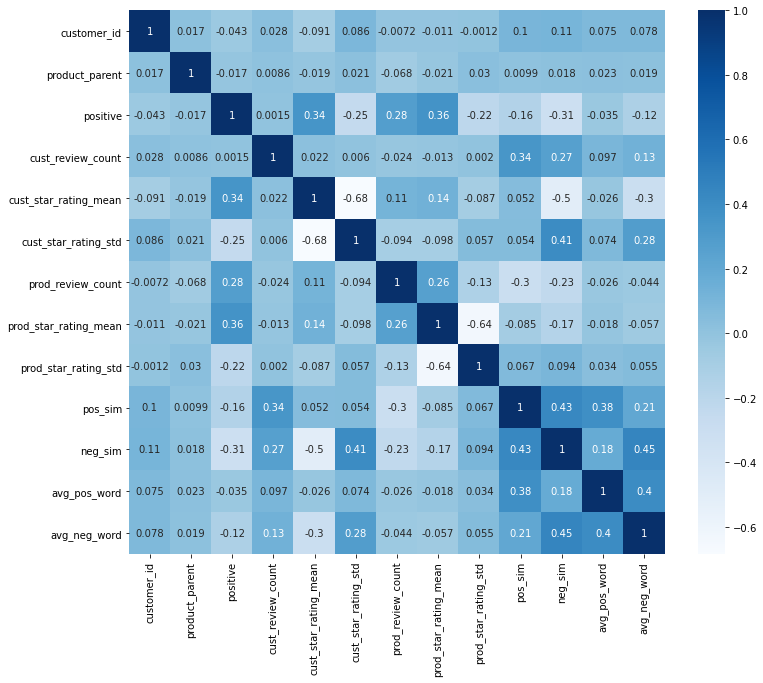

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [16]:
drop_cols = ['customer_id', 'product_parent', 'cust_review_count', 'prod_review_count', 
             'cust_star_rating_std', 'prod_star_rating_std']
             #'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
             #'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 
             #'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_x.drop(drop_cols, axis=1), train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
gb.score(test_x.drop(drop_cols, axis=1), test_y)

0.7149574563367667

In [19]:
evaluate(gb, test_x.drop(drop_cols, axis=1), test_y)

Correct: 6386 0.7149574563367667
Pos: 4577 0.5124272279444694
Star Correct: 6386 0.7149574563367667
True Positive: 3695 0.4136811464397671
True Negative: 2691 0.30127630989699955
False Positive: 882 0.0987460815047022
False Negative: 1664 0.18629646215853113


In [20]:
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=-1)
rf.fit(train_x.drop(drop_cols, axis=1), train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [21]:
rf.score(test_x.drop(drop_cols, axis=1), test_y)

0.7072324227496641

In [22]:
evaluate(rf, test_x.drop(drop_cols, axis=1), test_y)

Correct: 6317 0.7072324227496641
Pos: 4528 0.5069413345275414
Star Correct: 6317 0.7072324227496641
True Positive: 3636 0.4070756829377519
True Negative: 2681 0.3001567398119122
False Positive: 892 0.09986565158978952
False Negative: 1723 0.19290192566054634


<BarContainer object of 6 artists>

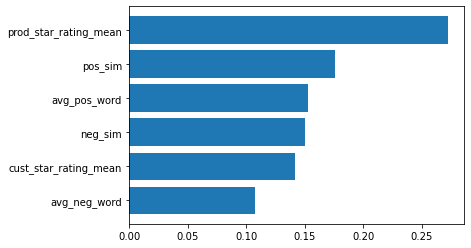

In [23]:
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), 
                 train_x.drop(drop_cols, axis=1).columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.barh(labl, imp, linewidth=5)

In [24]:
rf2 = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rf2.fit(train_x.drop(drop_cols, axis=1), train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [25]:
rf2.score(test_x.drop(drop_cols, axis=1), test_y)

0.15894520179553218

In [26]:
evaluate(rf2, test_x.drop(drop_cols, axis=1), test_y)

Correct: 6226 0.6970443349753694
Pos: 4455 0.4987684729064039
Star Correct: 39 0.004366323331840573
True Positive: 3554 0.3978952082400358
True Negative: 2672 0.2991491267353336
False Positive: 901 0.10087326466636812
False Negative: 1805 0.20208240035826242


<BarContainer object of 6 artists>

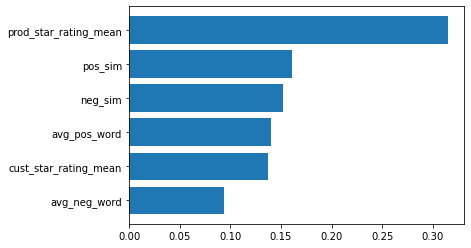

In [27]:
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf2.feature_importances_), 
                 train_x.drop(drop_cols, axis=1).columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.barh(labl, imp, linewidth=5)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn.fit(train_x.drop(drop_cols, axis=1), train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [29]:
knn.score(test_x.drop(drop_cols, axis=1), test_y)

0.625615763546798

In [30]:
evaluate(knn, test_x.drop(drop_cols, axis=1), test_y)

Correct: 5588 0.625615763546798
Pos: 4577 0.5124272279444694
Star Correct: 5588 0.625615763546798
True Positive: 3296 0.3690103000447828
True Negative: 2292 0.25660546350201524
False Positive: 1281 0.14341692789968652
False Negative: 2063 0.23096730855351544


In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x.drop(drop_cols, axis=1), train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
gnb.score(test_x.drop(drop_cols, axis=1), test_y)

0.7111509180474698

In [33]:
evaluate(gnb, test_x.drop(drop_cols, axis=1), test_y)

Correct: 6352 0.7111509180474698
Pos: 5463 0.6116211374832065
Star Correct: 6352 0.7111509180474698
True Positive: 4121 0.46137483206448726
True Negative: 2231 0.24977608598298254
False Positive: 1342 0.15024630541871922
False Negative: 1238 0.138602776533811


In [78]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
import keras
import numpy as np

In [79]:
keras.backend.clear_session()

In [80]:
nn_train_x = train_x.drop(drop_cols, axis=1)
nn_test_x = test_x.drop(drop_cols, axis=1)

In [81]:
np.shape(nn_train_x)

(23827, 6)

In [82]:
network = models.Sequential()
network.add(layers.Dense(1, activation='sigmoid', input_shape=(6,)))
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [83]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

epochs = 500
history = network.fit(nn_train_x, 
                      train_y, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(nn_test_x, test_y))

Train on 23827 samples, validate on 8932 samples
Epoch 1/500
23827/23827 [==============================] - 0s 18us/step - loss: 0.7561 - accuracy: 0.4810 - val_loss: 0.6591 - val_accuracy: 0.6094
Epoch 2/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.6556 - accuracy: 0.6171 - val_loss: 0.6543 - val_accuracy: 0.6122
Epoch 3/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.6527 - accuracy: 0.6198 - val_loss: 0.6511 - val_accuracy: 0.6158
Epoch 4/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.6499 - accuracy: 0.6231 - val_loss: 0.6483 - val_accuracy: 0.6211
Epoch 5/500
23827/23827 [==============================] - 0s 14us/step - loss: 0.6474 - accuracy: 0.6257 - val_loss: 0.6449 - val_accuracy: 0.6227
Epoch 6/500
23827/23827 [==============================] - 0s 16us/step - loss: 0.6450 - accuracy: 0.6273 - val_loss: 0.6422 - val_accuracy: 0.6263
Epoch 7/500
23827/23827 [==============================] - 0s 1

Epoch 56/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5786 - accuracy: 0.6985 - val_loss: 0.5732 - val_accuracy: 0.7179
Epoch 57/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5779 - accuracy: 0.6983 - val_loss: 0.5749 - val_accuracy: 0.7195
Epoch 58/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5772 - accuracy: 0.6995 - val_loss: 0.5739 - val_accuracy: 0.7204
Epoch 59/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5766 - accuracy: 0.7004 - val_loss: 0.5727 - val_accuracy: 0.7201
Epoch 60/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5760 - accuracy: 0.7003 - val_loss: 0.5712 - val_accuracy: 0.7201
Epoch 61/500
23827/23827 [==============================] - 0s 16us/step - loss: 0.5754 - accuracy: 0.7018 - val_loss: 0.5726 - val_accuracy: 0.7216
Epoch 62/500
23827/23827 [==============================] - 0s 16us/step - loss: 0.5748 - accuracy: 0.7019

Epoch 111/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5563 - accuracy: 0.7193 - val_loss: 0.5573 - val_accuracy: 0.7250
Epoch 112/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5561 - accuracy: 0.7197 - val_loss: 0.5568 - val_accuracy: 0.7249
Epoch 113/500
23827/23827 [==============================] - 0s 18us/step - loss: 0.5558 - accuracy: 0.7198 - val_loss: 0.5606 - val_accuracy: 0.7232
Epoch 114/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5556 - accuracy: 0.7194 - val_loss: 0.5616 - val_accuracy: 0.7231
Epoch 115/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5553 - accuracy: 0.7201 - val_loss: 0.5579 - val_accuracy: 0.7246
Epoch 116/500
23827/23827 [==============================] - 0s 16us/step - loss: 0.5552 - accuracy: 0.7198 - val_loss: 0.5589 - val_accuracy: 0.7231
Epoch 117/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5549 - accuracy:

23827/23827 [==============================] - 0s 15us/step - loss: 0.5473 - accuracy: 0.7273 - val_loss: 0.5586 - val_accuracy: 0.7263
Epoch 166/500
23827/23827 [==============================] - 0s 16us/step - loss: 0.5471 - accuracy: 0.7269 - val_loss: 0.5562 - val_accuracy: 0.7242
Epoch 167/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5471 - accuracy: 0.7268 - val_loss: 0.5562 - val_accuracy: 0.7244
Epoch 168/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5470 - accuracy: 0.7268 - val_loss: 0.5558 - val_accuracy: 0.7239
Epoch 169/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5468 - accuracy: 0.7272 - val_loss: 0.5536 - val_accuracy: 0.7250
Epoch 170/500
23827/23827 [==============================] - 0s 16us/step - loss: 0.5467 - accuracy: 0.7270 - val_loss: 0.5577 - val_accuracy: 0.7260
Epoch 171/500
23827/23827 [==============================] - 0s 16us/step - loss: 0.5466 - accuracy: 0.7270 - val_

Epoch 220/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5424 - accuracy: 0.7309 - val_loss: 0.5545 - val_accuracy: 0.7256
Epoch 221/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5422 - accuracy: 0.7303 - val_loss: 0.5542 - val_accuracy: 0.7260
Epoch 222/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5422 - accuracy: 0.7315 - val_loss: 0.5529 - val_accuracy: 0.7264
Epoch 223/500
23827/23827 [==============================] - 0s 17us/step - loss: 0.5422 - accuracy: 0.7308 - val_loss: 0.5567 - val_accuracy: 0.7260
Epoch 224/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5421 - accuracy: 0.7297 - val_loss: 0.5618 - val_accuracy: 0.7232
Epoch 225/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5422 - accuracy: 0.7315 - val_loss: 0.5529 - val_accuracy: 0.7265
Epoch 226/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5421 - accuracy:

23827/23827 [==============================] - 0s 17us/step - loss: 0.5396 - accuracy: 0.7327 - val_loss: 0.5544 - val_accuracy: 0.7249
Epoch 275/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5396 - accuracy: 0.7332 - val_loss: 0.5580 - val_accuracy: 0.7259
Epoch 276/500
23827/23827 [==============================] - 0s 16us/step - loss: 0.5396 - accuracy: 0.7332 - val_loss: 0.5562 - val_accuracy: 0.7260
Epoch 277/500
23827/23827 [==============================] - 0s 18us/step - loss: 0.5395 - accuracy: 0.7335 - val_loss: 0.5565 - val_accuracy: 0.7262
Epoch 278/500
23827/23827 [==============================] - 0s 20us/step - loss: 0.5395 - accuracy: 0.7337 - val_loss: 0.5573 - val_accuracy: 0.7257
Epoch 279/500
23827/23827 [==============================] - 0s 17us/step - loss: 0.5394 - accuracy: 0.7335 - val_loss: 0.5555 - val_accuracy: 0.7254
Epoch 280/500
23827/23827 [==============================] - 0s 16us/step - loss: 0.5393 - accuracy: 0.7339 - val_

Epoch 329/500
23827/23827 [==============================] - 0s 17us/step - loss: 0.5378 - accuracy: 0.7346 - val_loss: 0.5561 - val_accuracy: 0.7265
Epoch 330/500
23827/23827 [==============================] - 0s 16us/step - loss: 0.5378 - accuracy: 0.7351 - val_loss: 0.5578 - val_accuracy: 0.7257
Epoch 331/500
23827/23827 [==============================] - 0s 17us/step - loss: 0.5378 - accuracy: 0.7355 - val_loss: 0.5534 - val_accuracy: 0.7263
Epoch 332/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5377 - accuracy: 0.7348 - val_loss: 0.5548 - val_accuracy: 0.7263
Epoch 333/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5378 - accuracy: 0.7347 - val_loss: 0.5578 - val_accuracy: 0.7257
Epoch 334/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5377 - accuracy: 0.7355 - val_loss: 0.5599 - val_accuracy: 0.7262
Epoch 335/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5377 - accuracy:

23827/23827 [==============================] - 0s 15us/step - loss: 0.5368 - accuracy: 0.7359 - val_loss: 0.5596 - val_accuracy: 0.7264
Epoch 384/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5367 - accuracy: 0.7354 - val_loss: 0.5565 - val_accuracy: 0.7266
Epoch 385/500
23827/23827 [==============================] - 0s 17us/step - loss: 0.5367 - accuracy: 0.7356 - val_loss: 0.5540 - val_accuracy: 0.7259
Epoch 386/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5367 - accuracy: 0.7355 - val_loss: 0.5553 - val_accuracy: 0.7263
Epoch 387/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5367 - accuracy: 0.7349 - val_loss: 0.5579 - val_accuracy: 0.7259
Epoch 388/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5366 - accuracy: 0.7355 - val_loss: 0.5577 - val_accuracy: 0.7258
Epoch 389/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5366 - accuracy: 0.7364 - val_

Epoch 438/500
23827/23827 [==============================] - 0s 16us/step - loss: 0.5360 - accuracy: 0.7363 - val_loss: 0.5581 - val_accuracy: 0.7259
Epoch 439/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5359 - accuracy: 0.7361 - val_loss: 0.5554 - val_accuracy: 0.7269
Epoch 440/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5360 - accuracy: 0.7358 - val_loss: 0.5566 - val_accuracy: 0.7264
Epoch 441/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5359 - accuracy: 0.7355 - val_loss: 0.5605 - val_accuracy: 0.7253
Epoch 442/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5360 - accuracy: 0.7363 - val_loss: 0.5608 - val_accuracy: 0.7248
Epoch 443/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5360 - accuracy: 0.7360 - val_loss: 0.5580 - val_accuracy: 0.7259
Epoch 444/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5359 - accuracy:

23827/23827 [==============================] - 0s 16us/step - loss: 0.5355 - accuracy: 0.7365 - val_loss: 0.5585 - val_accuracy: 0.7256
Epoch 493/500
23827/23827 [==============================] - 0s 17us/step - loss: 0.5354 - accuracy: 0.7364 - val_loss: 0.5595 - val_accuracy: 0.7249
Epoch 494/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5355 - accuracy: 0.7367 - val_loss: 0.5567 - val_accuracy: 0.7264
Epoch 495/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5355 - accuracy: 0.7363 - val_loss: 0.5599 - val_accuracy: 0.7247
Epoch 496/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5354 - accuracy: 0.7365 - val_loss: 0.5644 - val_accuracy: 0.7255
Epoch 497/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5355 - accuracy: 0.7356 - val_loss: 0.5547 - val_accuracy: 0.7270
Epoch 498/500
23827/23827 [==============================] - 0s 15us/step - loss: 0.5355 - accuracy: 0.7361 - val_

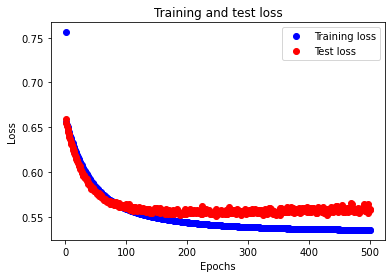

In [84]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

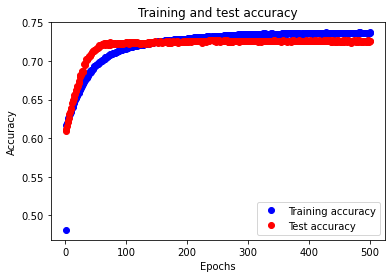

In [85]:
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [86]:
correct = 0
pos_count = 0
star_cor = 0
matrix = [0, 0, 0, 0]
preds = network.predict(nn_test_x)
for i in range(len(test_y)):
    if (preds[i] > 0.5):
        pos_count += 1
    if (preds[i] == test_y.iloc[i]):
        star_cor += 1
    if (preds[i] > 0.5 and test_y.iloc[i] > 0.5):
        correct += 1
        matrix[0] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] <= 0.5):
        correct += 1
        matrix[1] += 1
    elif (preds[i] > 0.5 and test_y.iloc[i] <= 0.5):
        matrix[2] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] > 0.5):
        matrix[3] += 1

print('Correct:', correct, correct / len(test_df))
print('Pos:', pos_count, pos_count / len(test_df))
print('Star Correct:', star_cor, star_cor / len(test_df))
print('True Positive:', matrix[0], matrix[0] / len(test_df))
print('True Negative:', matrix[1], matrix[1] / len(test_df))
print('False Positive:', matrix[2], matrix[2] / len(test_df))
print('False Negative:', matrix[3], matrix[3] / len(test_df))

Correct: 6485 0.7260412001791312
Pos: 5326 0.59628302731751
Star Correct: 0 0.0
True Positive: 4119 0.46115091804746977
True Negative: 2366 0.26489028213166144
False Positive: 1207 0.1351321092700403
False Negative: 1240 0.13882669055082847


In [87]:
nn_test_x_2 = test_df_og.drop(drop_cols + ['positive'], axis=1)
test_y_2 = test_df_og['positive']

correct = 0
pos_count = 0
star_cor = 0
matrix = [0, 0, 0, 0]
preds = network.predict(nn_test_x_2)
for i in range(len(test_y_2)):
    if (preds[i] > 0.5):
        pos_count += 1
    if (preds[i] == test_y_2.iloc[i]):
        star_cor += 1
    if (preds[i] > 0.5 and test_y_2.iloc[i] > 0.5):
        correct += 1
        matrix[0] += 1
    elif (preds[i] <= 0.5 and test_y_2.iloc[i] <= 0.5):
        correct += 1
        matrix[1] += 1
    elif (preds[i] > 0.5 and test_y_2.iloc[i] <= 0.5):
        matrix[2] += 1
    elif (preds[i] <= 0.5 and test_y_2.iloc[i] > 0.5):
        matrix[3] += 1

print('Correct:', correct, correct / len(test_df_og))
print('Pos:', pos_count, pos_count / len(test_df_og))
print('Star Correct:', star_cor, star_cor / len(test_df_og))
print('True Positive:', matrix[0], matrix[0] / len(test_df_og))
print('True Negative:', matrix[1], matrix[1] / len(test_df_og))
print('False Positive:', matrix[2], matrix[2] / len(test_df_og))
print('False Negative:', matrix[3], matrix[3] / len(test_df_og))

Correct: 10546 0.6659930533628039
Pos: 9387 0.5928007578149669
Star Correct: 0 0.0
True Positive: 8180 0.5165772023997474
True Negative: 2366 0.1494158509630565
False Positive: 1207 0.07622355541521945
False Negative: 4082 0.25778339122197663


In [88]:
#network.save('basic_neural_net6.h5')